## ================================================================
## Heart Disease Prediction - Machine Learning Models 
## ================================================================


This notebook aims to predict the likelihood of heart disease using various machine learning algorithms. We will be using data that includes several health indicators such as age, blood pressure, cholesterol levels, and more to develop models that can help in predicting heart disease. 

The steps in this notebook include:
- **Data Exploration**: Understanding the dataset and key features.
- **Data Preprocessing**: Cleaning the data, handling missing values, and normalizing features.
- **Modeling**: Implementing and evaluating different machine learning models including Logistic Regression, Support Vector Machine (SVM), and XGBoost.
- **Evaluation**: Comparing the performance of the models to identify the best one for heart disease prediction.

By the end of this notebook, we aim to have a well-performing model that can help in making predictions that may be useful for healthcare professionals to flag potential heart disease cases early on.



![Heart Disease Prediction](https://miro.medium.com/v2/resize:fit:828/format:webp/1*WoEu5XEHEwYFcDkbl1A3Bw.jpeg)


## ================================================================
## 1. Importing Libraries
## ================================================================

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from xgboost import XGBClassifier
import tkinter as tk
from tkinter import filedialog, messagebox
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score ,classification_report ,confusion_matrix


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv


## ================================================================
## 2. Loading Dataset
## ================================================================

In [2]:
file_path = '../input/heart-disease-prediction/Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)

data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## ================================================================
## 3. Data Exploration and Preprocessing
## ================================================================

In [3]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
data.isnull().values.any()

False

In [ ]:
data['Sex'].value_counts()

Sex
1    183
0     87
Name: count, dtype: int64

In [7]:
data['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [8]:
missing_values = data.isnull().sum()

missing_values

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

## ================================================================
## 4. Statistical Analysis in Python
## ================================================================

In [9]:
numerical_columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

mean_values = data[numerical_columns].mean()
print("Mean values of numerical columns:")
print(mean_values)

Mean values of numerical columns:
Age               54.433333
BP               131.344444
Cholesterol      249.659259
Max HR           149.677778
ST depression      1.050000
dtype: float64


In [10]:
std_values = data[numerical_columns].std()
print("\nStandard deviation of numerical columns:")
print(std_values)


Standard deviation of numerical columns:
Age               9.109067
BP               17.861608
Cholesterol      51.686237
Max HR           23.165717
ST depression     1.145210
dtype: float64


In [11]:
median_values = data[numerical_columns].median()
print("\nMedian values of numerical columns:")
print(median_values)


Median values of numerical columns:
Age               55.0
BP               130.0
Cholesterol      245.0
Max HR           153.5
ST depression      0.8
dtype: float64


In [12]:
categorical_columns = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']

for col in categorical_columns:
    print(f"\nFrequency distribution for {col}:")
    print(data[col].value_counts())

print("\nStatistical Summary:")
print(data.describe())


Frequency distribution for Sex:
Sex
1    183
0     87
Name: count, dtype: int64

Frequency distribution for Chest pain type:
Chest pain type
4    129
3     79
2     42
1     20
Name: count, dtype: int64

Frequency distribution for FBS over 120:
FBS over 120
0    230
1     40
Name: count, dtype: int64

Frequency distribution for EKG results:
EKG results
2    137
0    131
1      2
Name: count, dtype: int64

Frequency distribution for Exercise angina:
Exercise angina
0    181
1     89
Name: count, dtype: int64

Frequency distribution for Slope of ST:
Slope of ST
1    130
2    122
3     18
Name: count, dtype: int64

Frequency distribution for Number of vessels fluro:
Number of vessels fluro
0    160
1     58
2     33
3     19
Name: count, dtype: int64

Frequency distribution for Thallium:
Thallium
3    152
7    104
6     14
Name: count, dtype: int64

Frequency distribution for Heart Disease:
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

Statistical Summary:
    

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

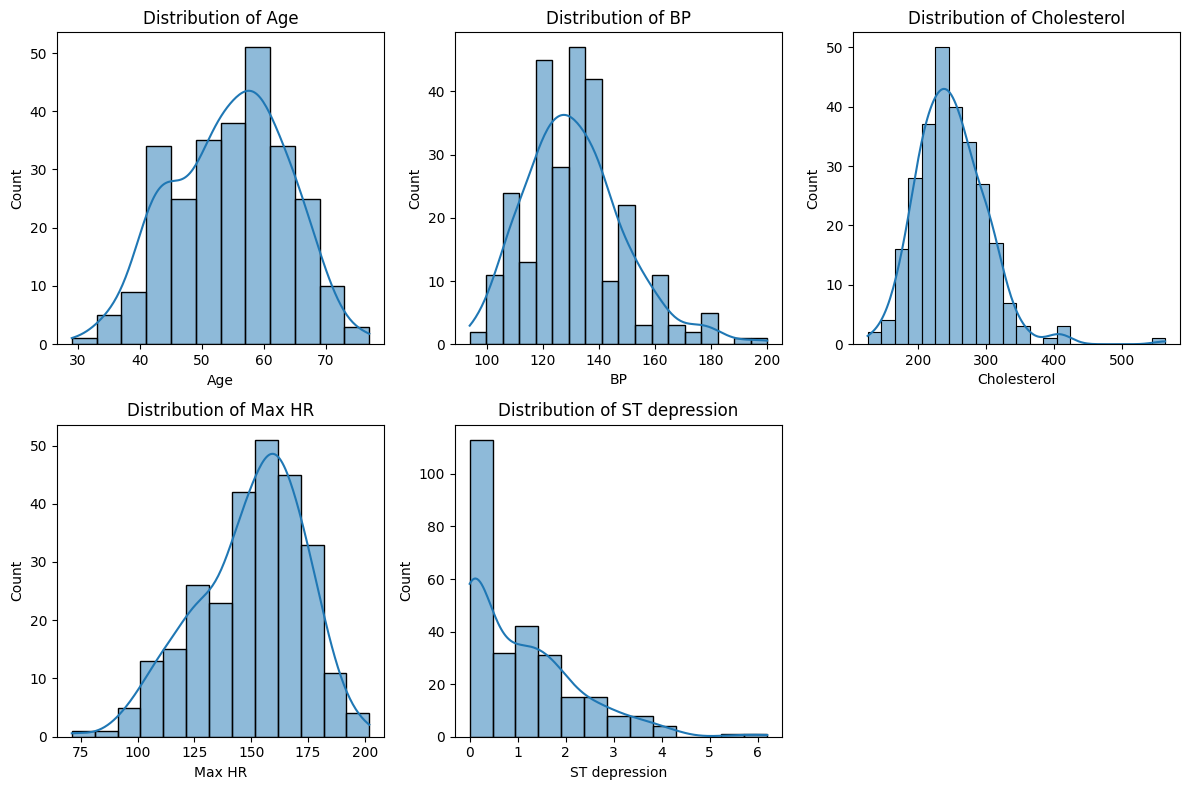

In [13]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

## ================================================================
## 5. Encoding Categorical Variables
## ================================================================

In [14]:
le = LabelEncoder()

data['Heart Disease'] = le.fit_transform(data['Heart Disease'])

categorical_columns = ['Chest pain type', 'EKG results', 'Slope of ST', 'Thallium']

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

data.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,3,130,322,0,2,109,0,2.4,1,3,0,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,2,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,2,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,2,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,0,0


## ================================================================
## 6. Normalizing Numerical Columns
## ================================================================

In [15]:
scaler = MinMaxScaler()

numerical_columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0.854167,1,3,0.339623,0.447489,0,2,0.290076,0,0.387097,1,3,0,1
1,0.791667,0,2,0.198113,1.000000,0,2,0.679389,0,0.258065,1,0,2,0
2,0.583333,1,1,0.283019,0.308219,0,0,0.534351,0,0.048387,0,0,2,1
3,0.729167,1,3,0.320755,0.312785,0,0,0.259542,1,0.032258,1,1,2,0
4,0.937500,0,1,0.245283,0.326484,0,2,0.381679,1,0.032258,0,1,0,0


## ================================================================
## 7. Correlation Matrix Analysis
## ================================================================

In [16]:
correlation_matrix = data.corr()

correlation_matrix

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.099055,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.376936,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.266614,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.127273,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.040317,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.044770,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.004143,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.241003,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.319499,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.325240,0.417967


## ================================================================
## 8. Train-Test Split
## ================================================================

In [17]:
X = data.drop(columns=['Heart Disease'])  
y = data['Heart Disease']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 13), (54, 13), (216,), (54,))

## ================================================================
## 9. Feature Scaling for Model Training
## ================================================================

In [18]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(X_train_scaled.shape, X_test_scaled.shape)
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled testing data shape:", X_test_scaled.shape)

Scaled training data shape: (216, 13)
Scaled testing data shape: (54, 13)


## ================================================================
## 10. Model Training & Evaluation
## ================================================================

### --- Logistic Regression ---


In [19]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)
logistic_y_pred = logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)

### --- Support Vector Machine (SVM) ---


In [20]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_y_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

### --- XGBoost Classifier ---


In [21]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=10)
xgb_model.fit(X_train_scaled, y_train)
xgb_y_pred = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

In [22]:
model_accuracies = {
    'Logistic Regression': logistic_accuracy,
    'SVM': svm_accuracy,
    'XGBoost': xgb_accuracy
}

results = pd.DataFrame({'Model': model_accuracies.keys(), 'Accuracy': model_accuracies.values()})
print(results)


                 Model  Accuracy
0  Logistic Regression  0.925926
1                  SVM  0.870370
2              XGBoost  0.870370


## ================================================================
## 12. Comparing Model Performance
## ================================================================

In [23]:
results = pd.DataFrame({'Model': model_accuracies.keys(), 'Accuracy': model_accuracies.values()})
results

,Model,Accuracy
0,Logistic Regression,0.925926
1,SVM,0.870370
2,XGBoost,0.870370


In [24]:
report = classification_report(y_test, logistic_y_pred, target_names=['Absence', 'Presence'])
svm_report = classification_report(y_test, svm_y_pred, target_names=['Absence', 'Presence'])
xgb_report = classification_report(y_test, xgb_y_pred, target_names=['Absence', 'Presence'])


print(report)
print("=======================================================")
print(svm_report)
print("=======================================================")
print(xgb_report)

              precision    recall  f1-score   support

     Absence       0.91      0.97      0.94        33
    Presence       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54

              precision    recall  f1-score   support

     Absence       0.91      0.88      0.89        33
    Presence       0.82      0.86      0.84        21

    accuracy                           0.87        54
   macro avg       0.86      0.87      0.86        54
weighted avg       0.87      0.87      0.87        54

              precision    recall  f1-score   support

     Absence       0.88      0.91      0.90        33
    Presence       0.85      0.81      0.83        21

    accuracy                           0.87        54
   macro avg       0.87      0.86      0.86        54
weighted avg       0.87      0.87      0.87        54



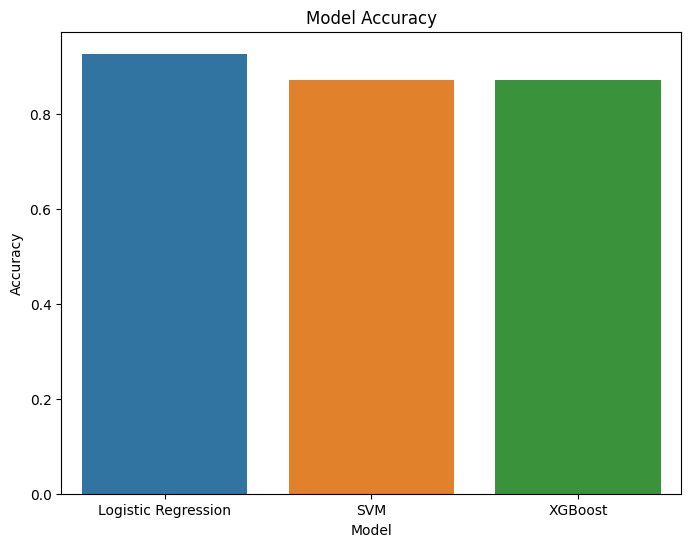

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


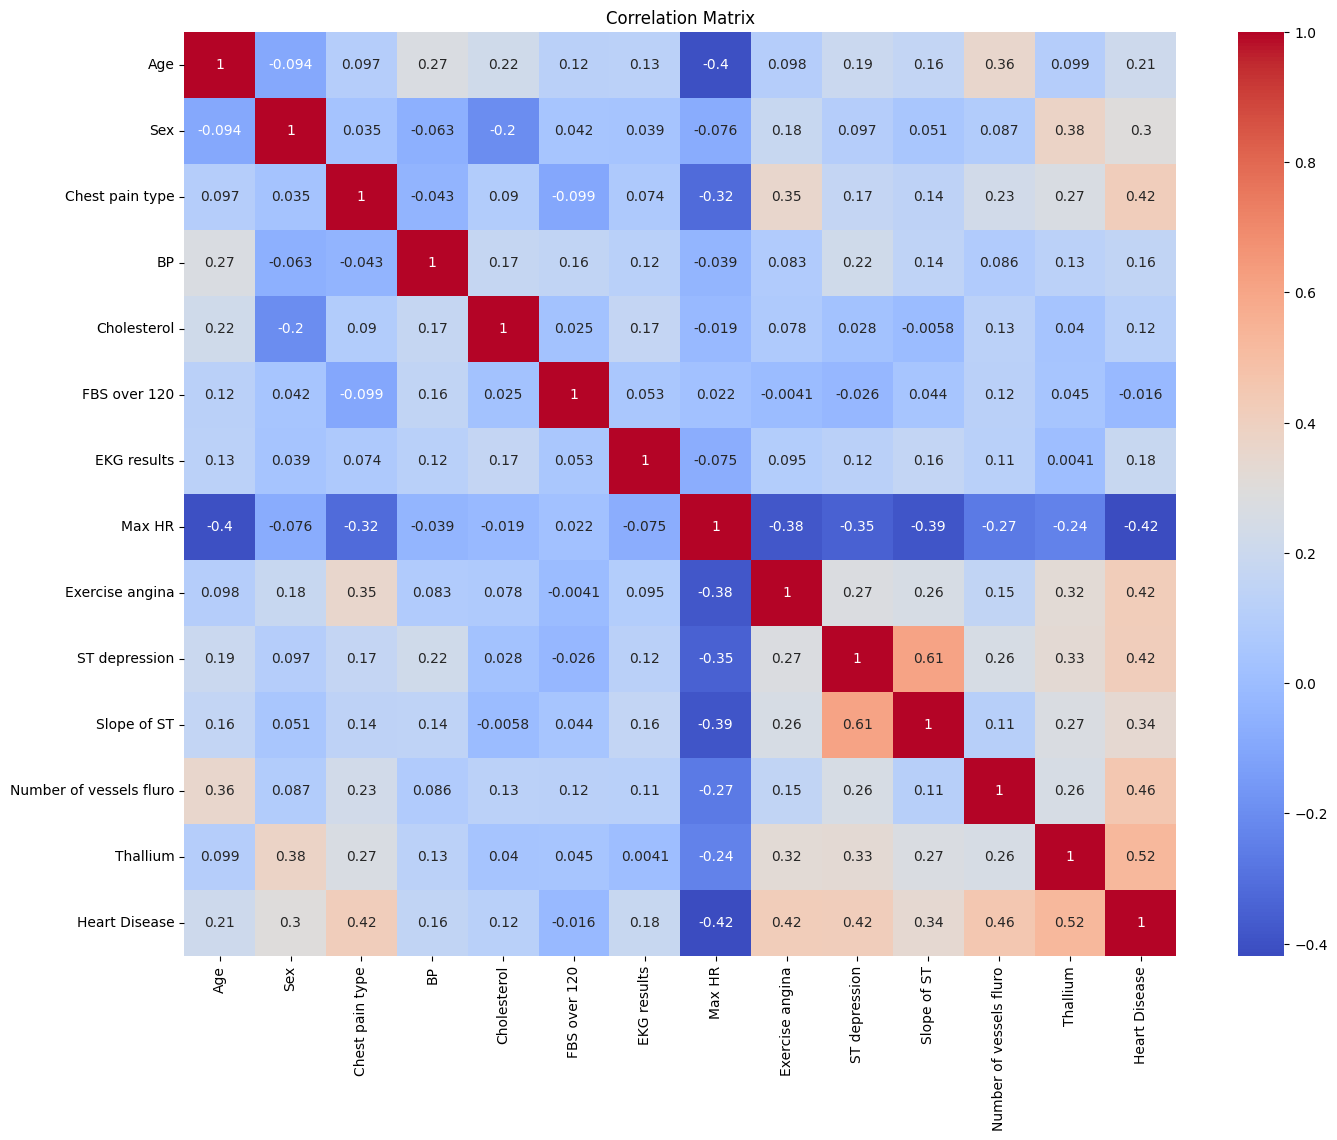

In [26]:
plt.figure(figsize=(16, 12))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Conclusion

In this notebook, we explored heart disease prediction using three different machine learning models: **Logistic Regression**, **Support Vector Machine (SVM)**, and **XGBoost**. Here's a summary of the steps we followed:

1. **Data Exploration & Preprocessing**: 
    - We began by analyzing and cleaning the dataset.
    - We handled missing values and used **Label Encoding** to transform categorical features and **MinMaxScaler** for normalizing numerical data.

2. **Statistical Analysis**:
    - We performed descriptive statistics, including calculating **mean**, **median**, and **standard deviation** for numerical features.
    - A **frequency distribution** was created for categorical variables to explore the data distribution.
    - A **correlation matrix** was generated to understand the relationships between features, giving insights into potential multicollinearity and feature importance.

3. **Feature Engineering & Scaling**: 
    - Important features were identified and scaled using **StandardScaler** to ensure the models perform optimally.

4. **Model Training & Evaluation**: 
    - Three models were trained: Logistic Regression, SVM, and XGBoost.
    - We compared the models using accuracy and observed their performance.

5. **Key Results**: 
    - All models performed reasonably well, with slight differences in accuracy.
    - Further improvements can be achieved with hyperparameter tuning, advanced feature engineering, and cross-validation techniques.

### Next Steps:

- **Hyperparameter Tuning**: We can use GridSearch or RandomizedSearch to find the optimal parameters for each model.
- **Additional Models**: Testing other algorithms such as **Random Forest** or **Neural Networks** could yield better results.
- **Feature Importance Analysis**: Using techniques like SHAP or LIME to explain model predictions and understand which features contribute most to the predictions.
- **Model Interpretability**: Applying techniques to improve model transparency for better decision-making.

By building a clear and well-structured process for prediction, we demonstrated how multiple machine learning models, combined with statistical analysis, can be employed for health-related datasets like heart disease. With further improvements, these models could potentially serve as a foundation for predictive healthcare tools.

---

Thank you for reading! If you found this notebook helpful, feel free to upvote and leave any feedback or questions in the comments below. Your input helps improve the community's knowledge and enhances future contributions. 😊
